Импортирование библиотек и загрузка датасета.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Предварительная обработка данных.

In [2]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train.shape

(60000, 28, 28, 1)

Построение модели.

In [3]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])


C:\Users\Алексей\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Конфигурация модели.

In [4]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Обучение модели.

In [5]:
start_time = time.time()
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=4, validation_split=0.2)
res = time.time()-start_time
res

Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9034 - loss: 0.2993 - val_accuracy: 0.9844 - val_loss: 0.0502
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9880 - val_loss: 0.0419
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9868 - val_loss: 0.0430
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9927 - loss: 0.0209 - val_accuracy: 0.9875 - val_loss: 0.0457


112.85396122932434

Оцениваем точность.

In [6]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9841 - loss: 0.0521


[0.04129742830991745, 0.9869999885559082]

Построение графиков.

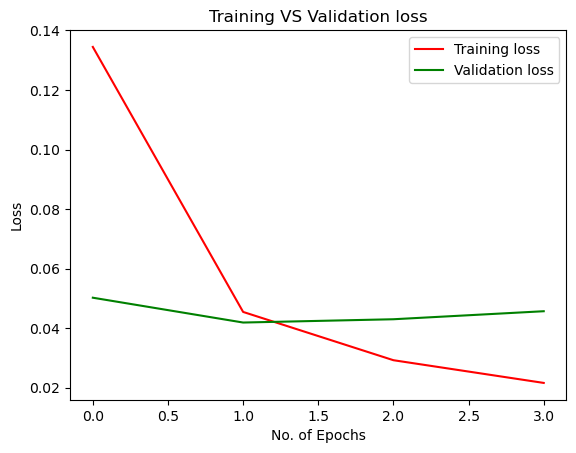

In [7]:
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

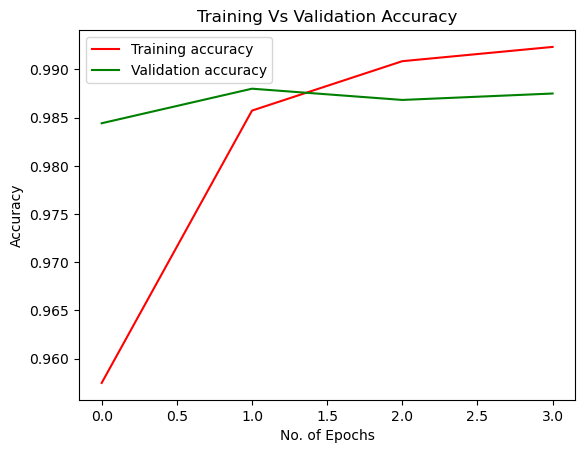

In [8]:
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()